In [1]:
import numpy as np
import csv
import itertools
from datetime import datetime
import matplotlib.pyplot as plt
import json


In [2]:
# helper function for json serialization

def json_serial(obj):
    """JSON serializer for objects not serializable by default json code"""

    if isinstance(obj, datetime):
        return obj.isoformat()
    raise TypeError ("Type %s not serializable" % type(obj))

In [3]:
# loading in npy files. takes forever, but works.

data = []

lti = np.load("xapi_data/LTI-Lab.npy", allow_pickle=True)
data.append("lti")
print("lti imported")

lti_2 = np.load("xapi_data/LTI-Lab_2.npy", allow_pickle=True)
data.append("lti_2")
print("lti_2 imported")

bibliothek = np.load("xapi_data/neben_der_bibliothek.npy", allow_pickle=True)
data.append("bibliothek")
print("bibliothek imported")

i1 = np.load("xapi_data/Seminarraum_i1.npy", allow_pickle=True)
data.append("i1")
print("i1 imported")

desktop = np.load("xapi_data/Desktop_Variant.npy", allow_pickle=True)
data.append("desktop")
print("desktop imported")

for a in data:
    print(a)
    for b in range(2):
        print(globals()[a][b])
    print("-----")


lti imported
lti_2 imported
bibliothek imported
i1 imported
desktop imported
lti
{'actor': {'objectType': 'Agent', 'name': 'DVRL58', 'mbox': 'mailto:dvrl58@lti-lab.de'}, 'verb': {'id': 'https://xapi.elearn.rwth-aachen.de/definitions/seriousGames/verbs/ended', 'display': {'en-US': 'ended', 'de-DE': 'beendete'}}, 'object': {'objectType': 'Activity', 'id': 'https://xapi.elearn.rwth-aachen.de/definitions/seriousGames/activities/game', 'definition': {'name': {'en-US': 'game', 'de-DE': 'Spiel'}, 'description': {'en-US': 'Represents a game or competition of any kind.', 'de-DE': 'Repräsentiert jede Art von Spiel.'}}}, 'result': {'completion': False, 'success': True, 'score': {'scaled': 0, 'raw': 0, 'min': 0, 'max': 13}}, 'context': {'platform': 'EduXR:VR', 'language': 'en', 'extensions': {'https://xapi.elearn.rwth-aachen.de/definitions/seriousGames/extensions/context/game': 'RePiX VR', 'https://xapi.elearn.rwth-aachen.de/definitions/generic/extensions/context/version': '1.10', 'https://xapi.el

In [4]:
# find out valid names ("whitelist")

pre_test = ["20202", "FVRK6", "dvrana4", "CVRS3", "bass999", "DVRL4", "DVRS4", "AVRK7", "EVRANA5", "fvrana6", "BVRK8", "CVRL3", "EVRS5", "CVRK9", "EVRL5", "avrana7", "BVRANA8", "FVRL6", "DVRK10", "FVRS6", "ami2018", "AVRS7", "RubberDuck", "BVRS8", "CVRS9", "CVRANA9", "CVRLG", "DVRANA10", "DVRL10", "DVR510", "EVRL11", "EVRS11", "FVRL12", "FVRS12", "EVRANA11", "AVRL13", "fvrauam", "AVRS13", "EVRS17", "CVRL15", "AVRANA13", "DVRL16", "FVRS18", "BVRL20", "AVRS19", "CVRL21", "BVRANA14", "EVRS23", "CVRANA15", "DVRL22", "EVRL23", "DVRANA16", "FVRL24", "AVRL25", "FVRS24", "BVRL26", "AVRS25", "BVRS26", "CVRL27", "EVRK11",
            "EVRANA17", "DVRL28", "EVRL29", "DVRS28", "FVRL30", "CVRS27", "FVRANA18", "FVRK12", "FVRL30", "AVRL31", "EVRS29", "AVRS31", "BVRL32", "AVRANA19", "cvrl33", "FVRS30", "DVRL34", "evrl35", "BVRS32", "CVRS32", "FVRL36", "BVRANA20", "AVRL37", "DVRS33", "AVRK13", "EVRS34", "CVRANA21", "BVRK14", "BVRL38", "DVRANA22", "AVRS36", "CVRK15", "DVRS39", "EVRANA23", "CVRL39", "DVRK16", "FVRANA24", "EVRS40", "dvrl40", "EVRL41", "FVRS35", "AVRL43", "DVRL46", "EVRL47", "BVRL44", "FVRL48", "AVRL49", "DVRL52", "bvrl50", "EVRL53", "FVRL54", "BVRS37", "AVRS42", "FVRS41", "AVRL55", "BVRL56", "BVRS43", "CVRS44", "DVRL58", "EVRL5g"]
pre_test_d = ["DD1", "CD2", "AD2", "FD1", "ED1", "ED2", "AD1", "AD3", "DD2", "CD1", "FD3", "BD3", "CD4", "FD4", "ED4", "AD5", "BD4", "BD5", "CD5", "DD5", "BD6", "ED6", "AD7", "ED5", "ED7", "DD6", "CD9", "BD9", "BD8", "AD8", "DD9", "FD6", "DD7", "AD10", "FD9", "BD10", "ED10", "FD11", "DD10", "FD10", "BD12", "AD11", "DD11", "CD12", "FD8", "AD4", "AD12", "FD7", "BD14", "ED3", "CD14",
              "FD12", "CD8", "AD13", "ED3", "FD4", "BD13", "DD14", "ED15", "FD14", "CD15", "DD7", "DD14", "ED11", "CD13", "ED14", "DD10", "FD13", "CD11", "AD14", "AD10", "CD14", "FD2", "CD18", "ED18", "ABCDEFG", "DD12", "DD16", "ED16", "DD18", "ED12", "AD17", "CD17", "FD17", "CD16", "CD19", "ED17", "FD15", "BD16", "DD17", "BD17", "BD2", "CD18", "ED19", "AD4", "BD20", "AD18", "CD3", "BD13"]

post_test = ["20202", "CVRS3", "dvrana4", "bass99", "FVRK6", "DVRS4", "DVRL4", "AVRK7", "evrana5", "fvrana6", "CVRL3", "BVRK8", "EVRS5", "EVLR5", "avrana7", "CVRK9", "bvrana8", "DVRK10", "FVRL6", "FVRS6", "ami2018", "AVRS7", "BVRS8", "RubberDuck", "CVRS9", "CVRLG", "CVRANA9", "DVRS10", "DVRANA10", "DVRL10", "EVRL11", "EVRS11", "FVRL12", "FVRS12", "EVRANA11", "AVRL13", "fvranam", "AVRS13", "AVRANA13", "CVRL15", "EVRS17", "FVRS18", "DVRL16", "BVRL20", "AVRS19", "BVRANA14", "CVRL21", "EVRS23", "CVRANA15", "DVRL22", "EVRL23", "FVRL24", "DVRANA16", "AVRL25", "BVRL26", "AVRS25", "CVRL27", "BVRS26", "EVRK11", "EVRANA17", "DVRL28",
             "DVRS28", "EVRL29", "FVRL30", "FVRK12", "FVRK12", "CVRS27", "FVRL30", "FVRANA18", "AVRL31", "BVRL32", "EVRS29", "AVRS31", "AVRANA19", "cvrl33", "FVRS30", "DVRL34", "EVRL35", "BVRS32", "CVRS32", "FVRL36", "BVRANA20", "AVRL37", "DVRS33", "AVRK13", "EVRS34", "BVRK14", "CVRANA21", "DVRANA22", "BVRL38", "AVRS36", "CVRK15", "DVRS39", "CVRL39", "EVRANA23", "DVRK16", "FVRANA24", "EVRS40", "dvrl40", "evrl41", "FVRS35", "AVRL43", "DVRL46", "EVRL47", "BVRL44", "FVRL48", "AVRL49", "DVRL52", "bvrl50", "EVRL23", "EVRL53", "FVRL54", "BVRS37", "AVRS42", "FVRS41", "AVRL55", "BVRL56", "BVRS43", "DVRL58", "CVRS44", "EVRL5g", "FD15"]
post_test_d = ["FD1", "ED2", "AD2", "CD2", "DD2", "BD3", "CD4", "Po-Yen chen", "AD5", "bla", "BD5", "DD5", "ED4", "ED6", "AD7", "ED7", "BD8", "DD9", "GZNeasjs6LY2Sij", "BD9", "DD1", "ED10", "FD9", "FD10", "DD11", "BD12", "FD6", "AD12", "FD12", "FD4", "AD8",
               "ED15", "DD14", "DD7", "CD15", "BD14", "DD10", "FD13", "FREEZZL", "CD11", "CD14", "FD2", "AD1", "FD8", "DeleteMe", "Blumenbeet", "ED16", "AD17", "CD19", "CD16", "ED18", "ED17", "BD16", "DD17", "DD6", "ED5", "BD17", "BD2", "CD1", "CD18", "AD18", "CD3"]

whitelist = []

# EVRANA17 took over 6 hours for the pipeline
blacklist = ["20202", "RubberDuck", "AMI2018", "EVRANA17"]

for x in pre_test:
    if x in post_test and x not in blacklist:
        whitelist.append(x.upper())

for y in pre_test_d:
    if y in post_test_d and y not in blacklist:
        whitelist.append(y.upper())

print(whitelist)


['FVRK6', 'DVRANA4', 'CVRS3', 'DVRL4', 'DVRS4', 'AVRK7', 'FVRANA6', 'BVRK8', 'CVRL3', 'EVRS5', 'CVRK9', 'AVRANA7', 'FVRL6', 'DVRK10', 'FVRS6', 'AMI2018', 'AVRS7', 'BVRS8', 'CVRS9', 'CVRANA9', 'CVRLG', 'DVRANA10', 'DVRL10', 'EVRL11', 'EVRS11', 'FVRL12', 'FVRS12', 'EVRANA11', 'AVRL13', 'AVRS13', 'EVRS17', 'CVRL15', 'AVRANA13', 'DVRL16', 'FVRS18', 'BVRL20', 'AVRS19', 'CVRL21', 'BVRANA14', 'EVRS23', 'CVRANA15', 'DVRL22', 'EVRL23', 'DVRANA16', 'FVRL24', 'AVRL25', 'BVRL26', 'AVRS25', 'BVRS26', 'CVRL27', 'EVRK11', 'DVRL28', 'EVRL29', 'DVRS28', 'FVRL30', 'CVRS27', 'FVRANA18', 'FVRK12', 'FVRL30', 'AVRL31', 'EVRS29', 'AVRS31', 'BVRL32', 'AVRANA19', 'CVRL33', 'FVRS30', 'DVRL34', 'BVRS32', 'CVRS32', 'FVRL36', 'BVRANA20', 'AVRL37', 'DVRS33', 'AVRK13', 'EVRS34', 'CVRANA21', 'BVRK14', 'BVRL38', 'DVRANA22', 'AVRS36', 'CVRK15', 'DVRS39', 'EVRANA23', 'CVRL39', 'DVRK16', 'FVRANA24', 'EVRS40', 'DVRL40', 'FVRS35', 'AVRL43', 'DVRL46', 'EVRL47', 'BVRL44', 'FVRL48', 'AVRL49', 'DVRL52', 'BVRL50', 'EVRL53', 'FV

In [5]:
# clear rows

z = 0  # To delete
u = 0  # To keep

for a in data:
    for b in range(globals()[a].size):
        if globals()[a][b]["actor"]["name"] not in whitelist:
            # more efficient because numpy is sooo bad at deleting array entries
            globals()[a][b] = "X"
            z += 1
        else:
            u += 1

print(z, u)

for a in data:
    print(a)
    for b in range(2):
        print(globals()[a][b])
    print("-----")


875453 2996476
lti
{'actor': {'objectType': 'Agent', 'name': 'DVRL58', 'mbox': 'mailto:dvrl58@lti-lab.de'}, 'verb': {'id': 'https://xapi.elearn.rwth-aachen.de/definitions/seriousGames/verbs/ended', 'display': {'en-US': 'ended', 'de-DE': 'beendete'}}, 'object': {'objectType': 'Activity', 'id': 'https://xapi.elearn.rwth-aachen.de/definitions/seriousGames/activities/game', 'definition': {'name': {'en-US': 'game', 'de-DE': 'Spiel'}, 'description': {'en-US': 'Represents a game or competition of any kind.', 'de-DE': 'Repräsentiert jede Art von Spiel.'}}}, 'result': {'completion': False, 'success': True, 'score': {'scaled': 0, 'raw': 0, 'min': 0, 'max': 13}}, 'context': {'platform': 'EduXR:VR', 'language': 'en', 'extensions': {'https://xapi.elearn.rwth-aachen.de/definitions/seriousGames/extensions/context/game': 'RePiX VR', 'https://xapi.elearn.rwth-aachen.de/definitions/generic/extensions/context/version': '1.10', 'https://xapi.elearn.rwth-aachen.de/definitions/seriousGames/extensions/contex

In [7]:
# show some not cleared columns

for a in data:
    i = 0
    print(a)
    for b in range(globals()[a].size):
        if (globals()[a][b] != "X"):
            if i < 3:
                print(globals()[a][b])
                i += 1
            else:
                break
    print("-----")


lti
{'actor': {'objectType': 'Agent', 'name': 'DVRL58', 'mbox': 'mailto:dvrl58@lti-lab.de'}, 'verb': {'id': 'https://xapi.elearn.rwth-aachen.de/definitions/seriousGames/verbs/ended', 'display': {'en-US': 'ended', 'de-DE': 'beendete'}}, 'object': {'objectType': 'Activity', 'id': 'https://xapi.elearn.rwth-aachen.de/definitions/seriousGames/activities/game', 'definition': {'name': {'en-US': 'game', 'de-DE': 'Spiel'}, 'description': {'en-US': 'Represents a game or competition of any kind.', 'de-DE': 'Repräsentiert jede Art von Spiel.'}}}, 'result': {'completion': False, 'success': True, 'score': {'scaled': 0, 'raw': 0, 'min': 0, 'max': 13}}, 'context': {'platform': 'EduXR:VR', 'language': 'en', 'extensions': {'https://xapi.elearn.rwth-aachen.de/definitions/seriousGames/extensions/context/game': 'RePiX VR', 'https://xapi.elearn.rwth-aachen.de/definitions/generic/extensions/context/version': '1.10', 'https://xapi.elearn.rwth-aachen.de/definitions/seriousGames/extensions/context/gamemode': 'D

In [8]:
# Question 2: How much time did subjects take in interactive and non-interactive parts in comparison?

# solar texturing lighting rasterization
stages = ["Application stage (interactive)", "Application stage", "Introduction into texturing",
          "Introduction into (Local) Lighting", "Introduction into rasterization"]

i = 0

for a in data:
    for b in range(globals()[a].size):
        if (globals()[a][b] != "X" and globals()[a][b]["object"]["id"] == "https://xapi.elearn.rwth-aachen.de/definitions/systemControl/activities/stage" and globals()[a][b]["verb"]["display"]["de-DE"] == "beendete"):
            if i < 5:
                print(globals()[a][b])
                i += 1
            else:
                break

activities = []

for a in data:
    for b in range(globals()[a].size):
        if (globals()[a][b] != "X" and globals()[a][b]["verb"]["display"]["de-DE"] == "beendete" and globals()[a][b]["context"]["extensions"]["https://xapi.elearn.rwth-aachen.de/definitions/generic/extensions/context/learningUnit"] not in activities):
            activities.append(globals()[a][b]["context"]["extensions"]
                              ["https://xapi.elearn.rwth-aachen.de/definitions/generic/extensions/context/learningUnit"])

print(activities)


{'actor': {'objectType': 'Agent', 'name': 'DVRL58', 'mbox': 'mailto:dvrl58@lti-lab.de'}, 'verb': {'id': 'https://xapi.elearn.rwth-aachen.de/definitions/systemControl/verbs/ended', 'display': {'en-US': 'ended', 'de-DE': 'beendete'}}, 'object': {'objectType': 'Activity', 'id': 'https://xapi.elearn.rwth-aachen.de/definitions/systemControl/activities/stage', 'definition': {'name': {'en-US': 'stage', 'de-DE': 'Spielabschnitt'}, 'description': {'en-US': 'A stage is a part of a level.', 'de-DE': 'Ein Spielabschnitt ist ein Teil eines Levels.'}, 'extensions': {'https://xapi.elearn.rwth-aachen.de/definitions/systemControl/extensions/activity/name': 'introduction'}}}, 'result': {'completion': False, 'success': True, 'score': {'scaled': 0, 'raw': 0, 'min': 0, 'max': 2}}, 'context': {'platform': 'EduXR:VR', 'language': 'en', 'extensions': {'https://xapi.elearn.rwth-aachen.de/definitions/seriousGames/extensions/context/game': 'RePiX VR', 'https://xapi.elearn.rwth-aachen.de/definitions/generic/exten

In [9]:
# Question 2: How much time did subjects take in interactive and non-interactive parts in comparison?

i = 0
j = 0
times = {}

for a in data:
    for b in range(globals()[a].size):
        if (globals()[a][b] != "X" and globals()[a][b]["verb"]["display"]["de-DE"] == "startete" and globals()[a][b]["object"]["id"] == "https://xapi.elearn.rwth-aachen.de/definitions/systemControl/activities/stage" and globals()[a][b]["context"]["extensions"]["https://xapi.elearn.rwth-aachen.de/definitions/generic/extensions/context/learningUnit"] in stages):
            i += 1


for a in data:
    for b in range(globals()[a].size):
        if (globals()[a][b] != "X" and globals()[a][b]["verb"]["display"]["de-DE"] == "beendete" and globals()[a][b]["object"]["id"] == "https://xapi.elearn.rwth-aachen.de/definitions/systemControl/activities/stage" and globals()[a][b]["context"]["extensions"]["https://xapi.elearn.rwth-aachen.de/definitions/generic/extensions/context/learningUnit"] in stages):
            j += 1

print(i, j)


0 2960


In [10]:
# Question 2: How much time did subjects take in interactive and non-interactive parts in comparison?

ending_times = {}

for a in data:
    for b in range(globals()[a].size):
        if (globals()[a][b] != "X" and globals()[a][b]["verb"]["display"]["de-DE"] == "beendete" and globals()[a][b]["object"]["id"] == "https://xapi.elearn.rwth-aachen.de/definitions/systemControl/activities/stage" and globals()[a][b]["context"]["extensions"]["https://xapi.elearn.rwth-aachen.de/definitions/generic/extensions/context/learningUnit"] in stages):
            if globals()[a][b]["actor"]["name"] not in ending_times:
                ending_times[globals()[a][b]["actor"]["name"]] = {
                    "group": globals()[a][b]["context"]["extensions"]["https://xapi.elearn.rwth-aachen.de/definitions/seriousGames/extensions/context/gamemode"],
                    "platform": globals()[a][b]["context"]["platform"],
                    "previous": 0,
                    "Application stage": 0,
                    "Introduction into texturing": 0,
                    "Introduction into (Local) Lighting": 0,
                    "Introduction into rasterization": 0
                }

for a in data:
    for b in range(globals()[a].size):
        if (globals()[a][b] != "X" and globals()[a][b]["verb"]["display"]["de-DE"] == "beendete" and globals()[a][b]["object"]["id"] == "https://xapi.elearn.rwth-aachen.de/definitions/systemControl/activities/stage" and globals()[a][b]["context"]["extensions"]["https://xapi.elearn.rwth-aachen.de/definitions/generic/extensions/context/learningUnit"] in stages):
            if (globals()[a][b]["context"]["extensions"]["https://xapi.elearn.rwth-aachen.de/definitions/generic/extensions/context/learningUnit"] == "Application stage (interactive)"):
                if ending_times[globals()[a][b]["actor"]["name"]]["Application stage"] == 0 or (ending_times[globals()[a][b]["actor"]["name"]]["Application stage"] < datetime.fromisoformat(globals()[a][b]["timestamp"][:-14])):
                    ending_times[globals()[a][b]["actor"]["name"]]["Application stage"] = datetime.fromisoformat(
                        globals()[a][b]["timestamp"][:-14])
            else:
                if ending_times[globals()[a][b]["actor"]["name"]][globals()[a][b]["context"]["extensions"]["https://xapi.elearn.rwth-aachen.de/definitions/generic/extensions/context/learningUnit"]] == 0 or (ending_times[globals()[a][b]["actor"]["name"]][globals()[a][b]["context"]["extensions"]["https://xapi.elearn.rwth-aachen.de/definitions/generic/extensions/context/learningUnit"]] < datetime.fromisoformat(globals()[a][b]["timestamp"][:-14])):
                    ending_times[globals()[a][b]["actor"]["name"]][globals()[a][b]["context"]["extensions"]
                                                                   ["https://xapi.elearn.rwth-aachen.de/definitions/generic/extensions/context/learningUnit"]] = datetime.fromisoformat(globals()[a][b]["timestamp"][:-14])
        elif (globals()[a][b] != "X" and globals()[a][b]["verb"]["display"]["de-DE"] == "beendete" and globals()[a][b]["object"]["id"] == "https://xapi.elearn.rwth-aachen.de/definitions/systemControl/activities/stage" and globals()[a][b]["context"]["extensions"]["https://xapi.elearn.rwth-aachen.de/definitions/generic/extensions/context/learningUnit"] not in stages):
            if (globals()[a][b]["actor"]["name"] in ending_times):
                ending_times[globals()[a][b]["actor"]["name"]]["previous"] = datetime.fromisoformat(
                    globals()[a][b]["timestamp"][:-14])

print(ending_times)


{'DVRL58': {'group': 'D', 'platform': 'EduXR:VR', 'previous': datetime.datetime(2022, 10, 26, 16, 38, 43), 'Application stage': datetime.datetime(2022, 10, 26, 16, 53, 34), 'Introduction into texturing': datetime.datetime(2022, 10, 26, 17, 5, 20), 'Introduction into (Local) Lighting': datetime.datetime(2022, 10, 26, 17, 4, 45), 'Introduction into rasterization': datetime.datetime(2022, 10, 26, 17, 2, 52)}, 'BVRL56': {'group': 'A', 'platform': 'EduXR:VR', 'previous': datetime.datetime(2022, 10, 26, 12, 13, 35), 'Application stage': datetime.datetime(2022, 10, 26, 12, 33, 43), 'Introduction into texturing': datetime.datetime(2022, 10, 26, 12, 46, 55), 'Introduction into (Local) Lighting': datetime.datetime(2022, 10, 26, 12, 44, 30), 'Introduction into rasterization': datetime.datetime(2022, 10, 26, 12, 43, 50)}, 'AVRL55': {'group': 'A', 'platform': 'EduXR:VR', 'previous': datetime.datetime(2022, 10, 26, 10, 50, 10), 'Application stage': datetime.datetime(2022, 10, 26, 11, 37, 11), 'Intro

In [11]:
# Question 2: How much time did subjects take in interactive and non-interactive parts in comparison?

incomplete = []

for p in ending_times:
    if ending_times[p]["previous"] == 0 or ending_times[p]["Application stage"] == 0 or ending_times[p]["Introduction into texturing"] == 0 or ending_times[p]["Introduction into (Local) Lighting"] == 0 or ending_times[p]["Introduction into rasterization"] == 0:
        incomplete.append(p)

for t in incomplete:
    ending_times.pop(t)

for p in ending_times:
    ending_times[p]["time_application"] = (
        ending_times[p]["Application stage"] - ending_times[p]["previous"]).seconds / 60
    ending_times[p]["time_texturing"] = (
        ending_times[p]["Introduction into texturing"] - ending_times[p]["Introduction into (Local) Lighting"]).seconds / 60
    ending_times[p]["time_lighting"] = (ending_times[p]["Introduction into (Local) Lighting"] -
                                        ending_times[p]["Introduction into rasterization"]).seconds / 60
    ending_times[p]["time_rasterization"] = (
        ending_times[p]["Introduction into rasterization"] - ending_times[p]["Application stage"]).seconds / 60

i = 0
for a in ending_times:
    if i > 10:
        break
    i += 1
    print(a, ending_times[a])


DVRL58 {'group': 'D', 'platform': 'EduXR:VR', 'previous': datetime.datetime(2022, 10, 26, 16, 38, 43), 'Application stage': datetime.datetime(2022, 10, 26, 16, 53, 34), 'Introduction into texturing': datetime.datetime(2022, 10, 26, 17, 5, 20), 'Introduction into (Local) Lighting': datetime.datetime(2022, 10, 26, 17, 4, 45), 'Introduction into rasterization': datetime.datetime(2022, 10, 26, 17, 2, 52), 'time_application': 14.85, 'time_texturing': 0.5833333333333334, 'time_lighting': 1.8833333333333333, 'time_rasterization': 9.3}
BVRL56 {'group': 'A', 'platform': 'EduXR:VR', 'previous': datetime.datetime(2022, 10, 26, 12, 13, 35), 'Application stage': datetime.datetime(2022, 10, 26, 12, 33, 43), 'Introduction into texturing': datetime.datetime(2022, 10, 26, 12, 46, 55), 'Introduction into (Local) Lighting': datetime.datetime(2022, 10, 26, 12, 44, 30), 'Introduction into rasterization': datetime.datetime(2022, 10, 26, 12, 43, 50), 'time_application': 20.133333333333333, 'time_texturing': 

In [20]:
# write ending_times to data files
with open("../../dashboard-app/src/data/ending_times.json", "w") as outfile:
    outfile.write(json.dumps(ending_times, indent=2, default=json_serial))

with open("../../dashboard-app/src/data/incomplete.json", "w") as outfile:
    outfile.write(json.dumps(incomplete, indent=2, default=json_serial))


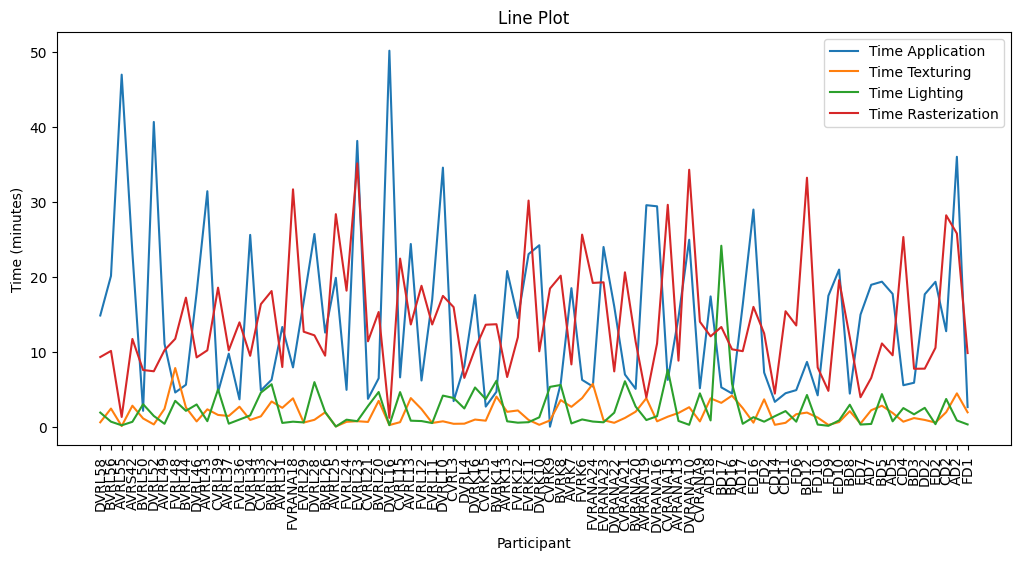

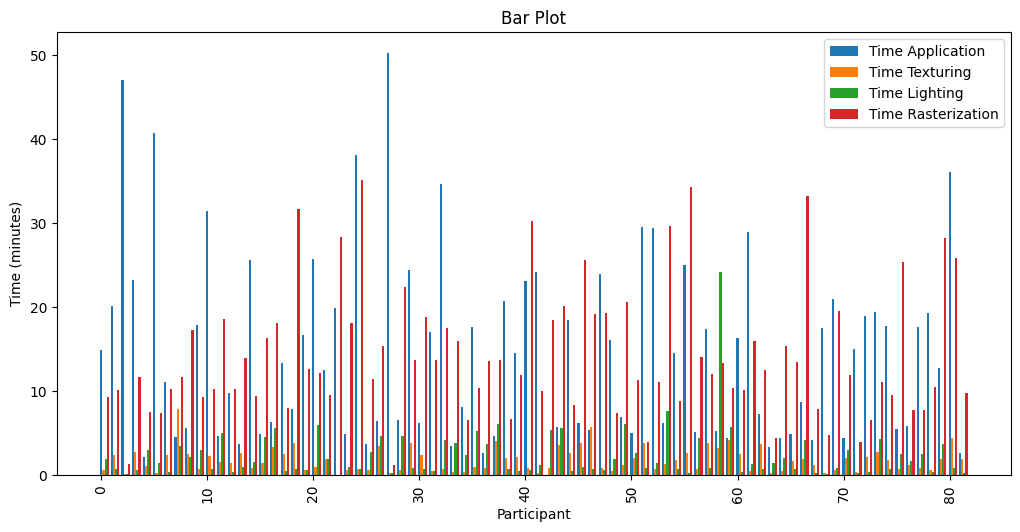

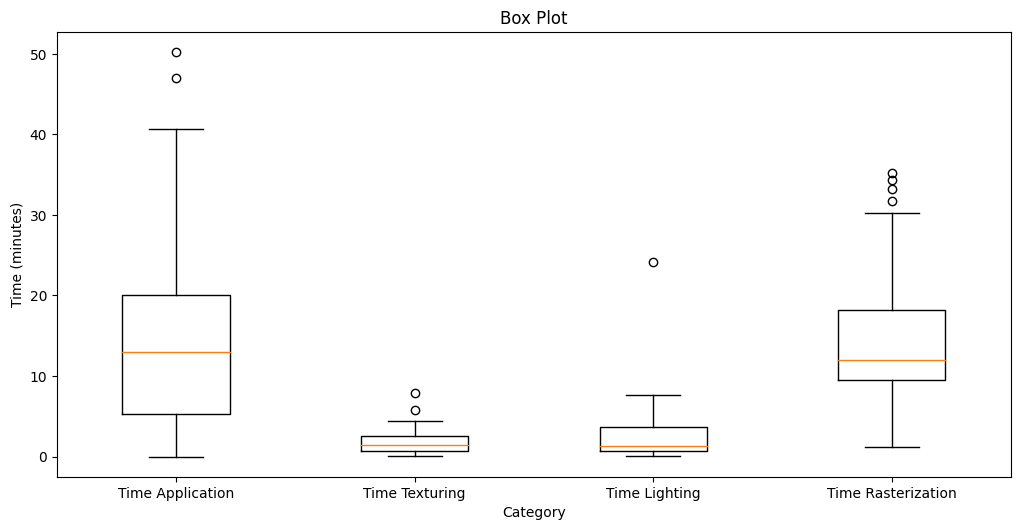

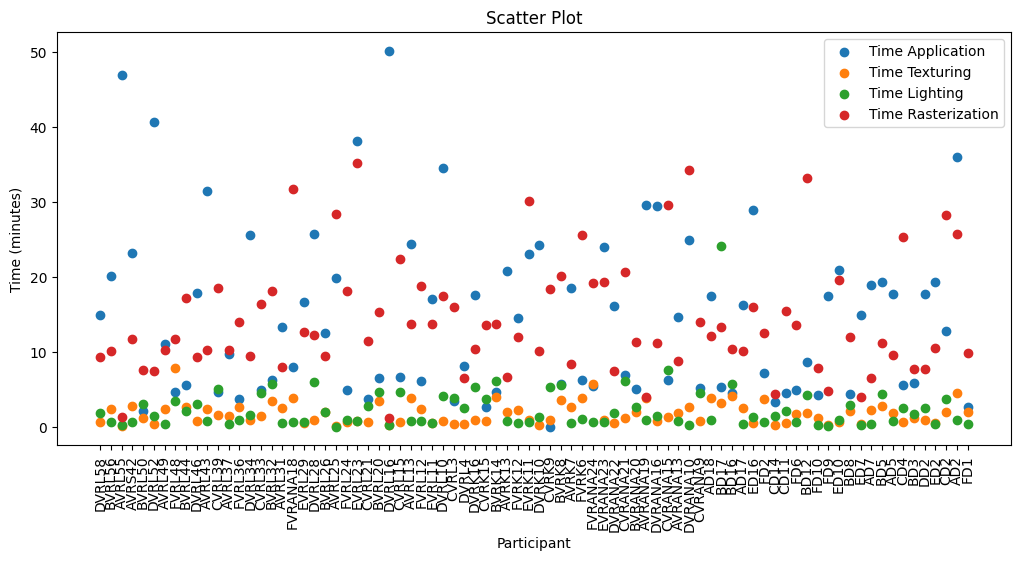

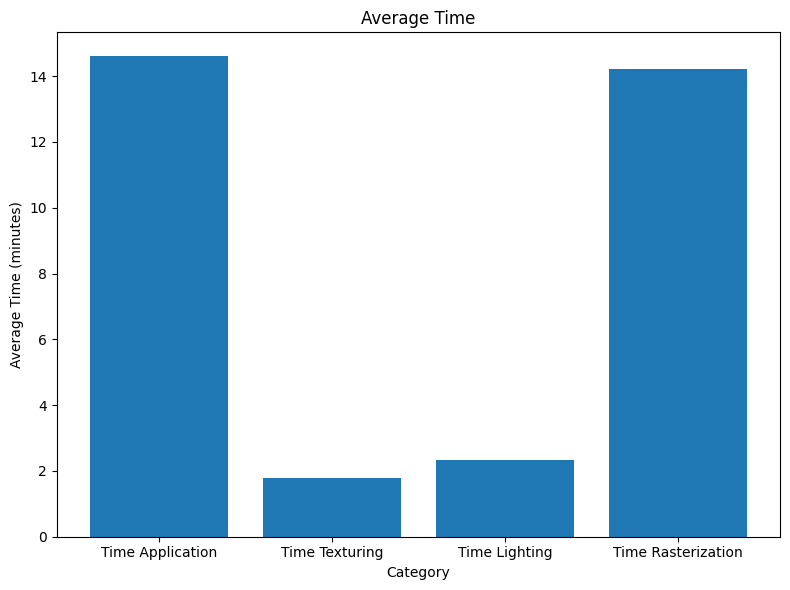

In [13]:
# Initialize dictionaries to store the aggregated time values
time_application_grouped = {}
time_texturing_grouped = {}
time_lighting_grouped = {}
time_rasterization_grouped = {}

# Aggregate the time values across all entries and apply filtering
for entry in ending_times:
    time_application = ending_times[entry]['time_application']
    time_texturing = ending_times[entry]['time_texturing']
    time_lighting = ending_times[entry]['time_lighting']
    time_rasterization = ending_times[entry]['time_rasterization']

    if time_application <= 60 and time_texturing <= 60 and time_lighting <= 60 and time_rasterization <= 60:
        time_application_grouped[entry] = time_application
        time_texturing_grouped[entry] = time_texturing
        time_lighting_grouped[entry] = time_lighting
        time_rasterization_grouped[entry] = time_rasterization

# Create a list of labels for the x-axis
labels = list(time_application_grouped.keys())

# Calculate average time for each category
average_application = np.mean(list(time_application_grouped.values()))
average_texturing = np.mean(list(time_texturing_grouped.values()))
average_lighting = np.mean(list(time_lighting_grouped.values()))
average_rasterization = np.mean(list(time_rasterization_grouped.values()))

# Method 1: Line Plot
plt.figure(figsize=(20, 10))
plt.subplot(2, 2, 1)
plt.plot(labels, list(time_application_grouped.values()),
         label='Time Application')
plt.plot(labels, list(time_texturing_grouped.values()), label='Time Texturing')
plt.plot(labels, list(time_lighting_grouped.values()), label='Time Lighting')
plt.plot(labels, list(time_rasterization_grouped.values()),
         label='Time Rasterization')
plt.xlabel('Participant')
plt.ylabel('Time (minutes)')
plt.title('Line Plot')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

# Method 2: Bar Plot
plt.figure(figsize=(20, 10))
plt.subplot(2, 2, 2)
bar_width = 0.2
index = np.arange(len(labels))
plt.bar(index, list(time_application_grouped.values()),
        bar_width, label='Time Application')
plt.bar(index + bar_width, list(time_texturing_grouped.values()),
        bar_width, label='Time Texturing')
plt.bar(index + 2 * bar_width, list(time_lighting_grouped.values()),
        bar_width, label='Time Lighting')
plt.bar(index + 3 * bar_width, list(time_rasterization_grouped.values()),
        bar_width, label='Time Rasterization')
plt.xlabel('Participant')
plt.ylabel('Time (minutes)')
plt.title('Bar Plot')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

# Method 3: Box Plot
plt.figure(figsize=(20, 10))
plt.subplot(2, 2, 3)
value_list = [list(time_application_grouped.values()), list(time_texturing_grouped.values(
)), list(time_lighting_grouped.values()), list(time_rasterization_grouped.values())]
plt.boxplot(value_list, labels=[
            'Time Application', 'Time Texturing', 'Time Lighting', 'Time Rasterization'])
plt.xlabel('Category')
plt.ylabel('Time (minutes)')
plt.title('Box Plot')
plt.tight_layout()
plt.show()

# Method 4: Scatter Plot
plt.figure(figsize=(20, 10))
plt.subplot(2, 2, 4)
plt.scatter(labels, list(time_application_grouped.values()),
            label='Time Application')
plt.scatter(labels, list(time_texturing_grouped.values()),
            label='Time Texturing')
plt.scatter(labels, list(time_lighting_grouped.values()),
            label='Time Lighting')
plt.scatter(labels, list(time_rasterization_grouped.values()),
            label='Time Rasterization')
plt.xlabel('Participant')
plt.ylabel('Time (minutes)')
plt.title('Scatter Plot')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

# Plot the average times
plt.figure(figsize=(8, 6))
categories = ['Time Application', 'Time Texturing',
              'Time Lighting', 'Time Rasterization']
averages = [average_application, average_texturing,
            average_lighting, average_rasterization]
plt.bar(categories, averages)
plt.xlabel('Category')
plt.ylabel('Average Time (minutes)')
plt.title('Average Time')
plt.tight_layout()
plt.show()


In [14]:
# Question 3: Comparison Interactive / Not-Interactive

#stages = ["Application stage (interactive)", "Application stage", "Introduction into texturing", "Introduction into (Local) Lighting", "Introduction into rasterization"]

interactive = {
    "A": [True, True, False, False],
    "B": [False, True, True, False],
    "C": [False, False, True, True],
    "D": [True, False, True, False],
    "E": [True, False, False, True],
    "F": [False, True, False, True]
}

times_sorted = {
    "interactive": {'application': [], 'texturing': [], 'lighting': [], 'rasterization': []},
    "non-interactive": {'application': [], 'texturing': [], 'lighting': [], 'rasterization': []}
}

for e in ending_times:
    if interactive[ending_times[e]["group"]][0]:
        times_sorted["interactive"]["application"].append(
            ending_times[e]["time_application"])
    else:
        times_sorted["non-interactive"]["application"].append(
            ending_times[e]["time_application"])

    if interactive[ending_times[e]["group"]][1]:
        times_sorted["interactive"]["texturing"].append(
            ending_times[e]["time_texturing"])
    else:
        times_sorted["non-interactive"]["texturing"].append(
            ending_times[e]["time_texturing"])

    if interactive[ending_times[e]["group"]][2]:
        times_sorted["interactive"]["lighting"].append(
            ending_times[e]["time_lighting"])
    else:
        times_sorted["non-interactive"]["lighting"].append(
            ending_times[e]["time_lighting"])

    if interactive[ending_times[e]["group"]][3]:
        times_sorted["interactive"]["rasterization"].append(
            ending_times[e]["time_rasterization"])
    else:
        times_sorted["non-interactive"]["rasterization"].append(
            ending_times[e]["time_rasterization"])


print(times_sorted)


{'interactive': {'application': [14.85, 20.133333333333333, 47.016666666666666, 23.25, 62.85, 40.7, 11.066666666666666, 19.416666666666668, 17.9, 31.45, 9.75, 25.616666666666667, 13.316666666666666, 16.716666666666665, 25.733333333333334, 19.883333333333333, 38.166666666666664, 36.983333333333334, 50.21666666666667, 24.4, 17.0, 34.6, 8.1, 17.583333333333332, 20.783333333333335, 23.05, 24.233333333333334, 18.5, 24.0, 16.066666666666666, 29.583333333333332, 29.433333333333334, 14.583333333333334, 53.61666666666667, 24.966666666666665, 1273.1666666666667, 17.4, 42.43333333333333, 16.266666666666666, 29.0, 290.5, 279.71666666666664, 20.983333333333334, 361.6666666666667, 14.966666666666667, 18.95, 320.5, 17.733333333333334, 17.683333333333334, 19.35, 36.05], 'texturing': [2.4166666666666665, 0.08333333333333333, 2.8, 1439.9333333333334, 1.1, 2.3833333333333333, 7.833333333333333, 2.566666666666667, 2.316666666666667, 3.15, 1.4333333333333333, 2.6666666666666665, 3.3666666666666667, 2.51666

In [23]:
with open("../../dashboard-app/src/data/interactive.json", "w") as outfile:
    outfile.write(json.dumps(interactive, indent=2, default=json_serial))

with open("../../dashboard-app/src/data/interactive_times.json", "w") as outfile:
    outfile.write(json.dumps(times_sorted, indent=2, default=json_serial))

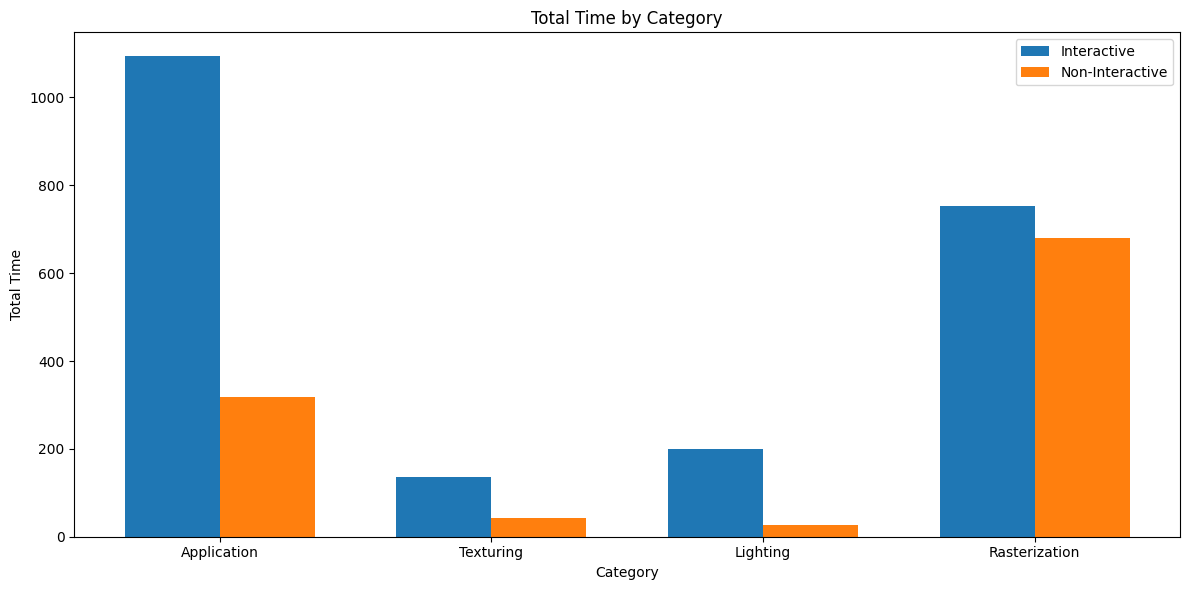

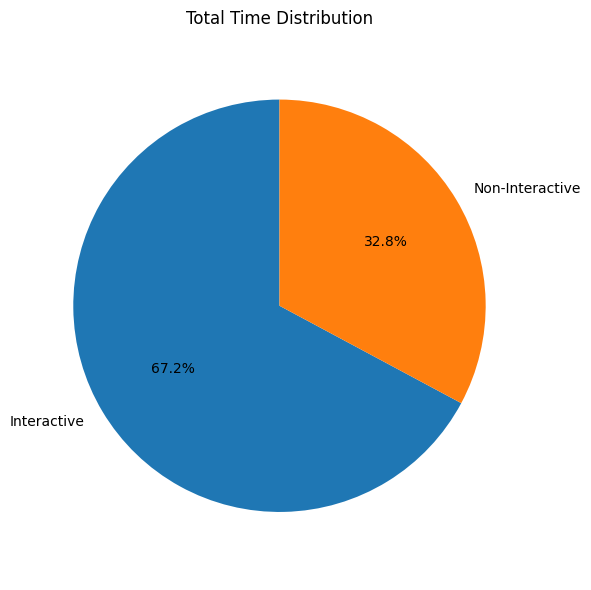

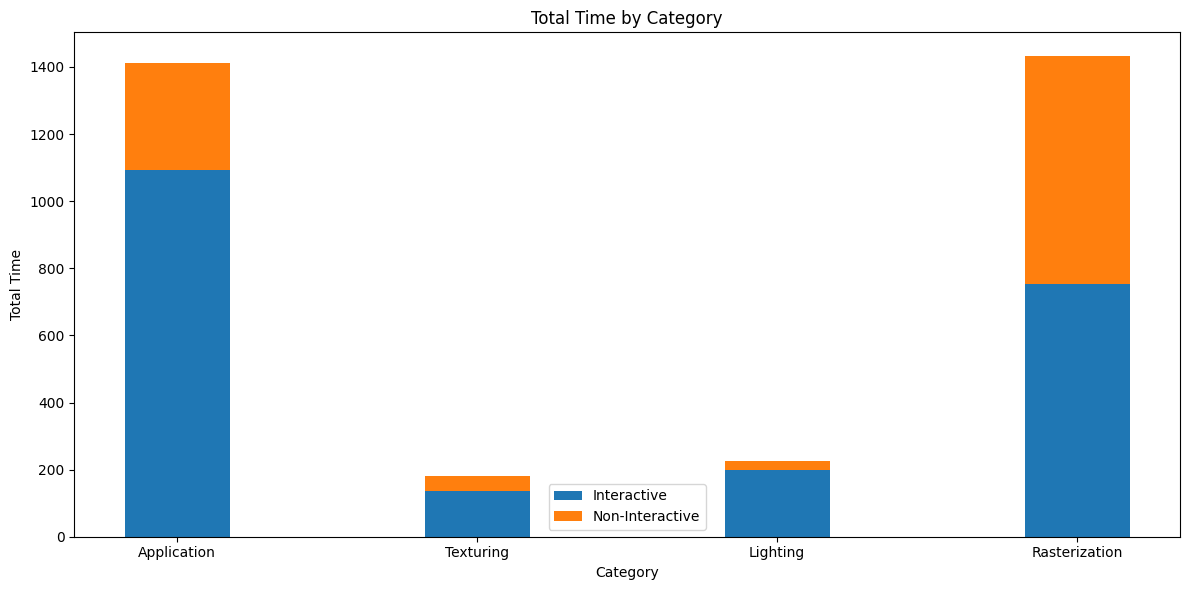

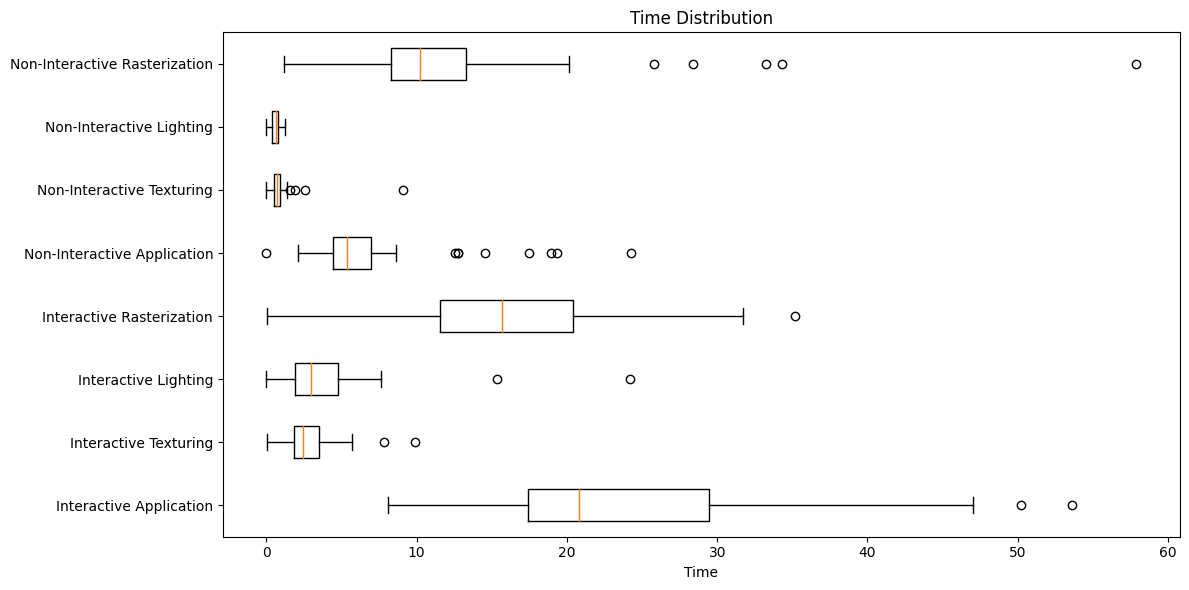

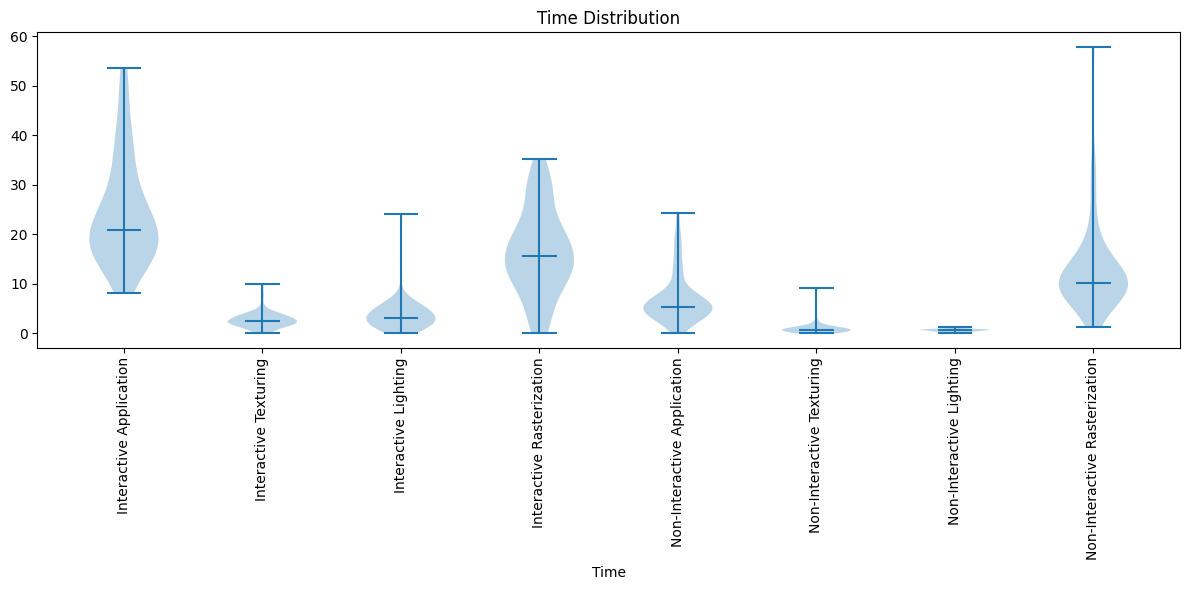

In [15]:
# Filter values over 60
for mode in times_sorted:
    for category in times_sorted[mode]:
        times_sorted[mode][category] = [
            value for value in times_sorted[mode][category] if value <= 60]

# Method 1: Bar Plot
plt.figure(figsize=(12, 6))
categories = ['Application', 'Texturing', 'Lighting', 'Rasterization']
interact_values = [sum(times_sorted["interactive"]['application']),
                   sum(times_sorted["interactive"]['texturing']),
                   sum(times_sorted["interactive"]['lighting']),
                   sum(times_sorted["interactive"]['rasterization'])]
non_interact_values = [sum(times_sorted["non-interactive"]['application']),
                       sum(times_sorted["non-interactive"]['texturing']),
                       sum(times_sorted["non-interactive"]['lighting']),
                       sum(times_sorted["non-interactive"]['rasterization'])]
bar_width = 0.35
index = range(len(categories))
plt.bar(index, interact_values, bar_width, label='Interactive')
plt.bar([i + bar_width for i in index], non_interact_values,
        bar_width, label='Non-Interactive')
plt.xlabel('Category')
plt.ylabel('Total Time')
plt.title('Total Time by Category')
plt.xticks([i + bar_width/2 for i in index], categories)
plt.legend()
plt.tight_layout()
plt.show()

# Method 2: Pie Chart
plt.figure(figsize=(6, 6))
labels = ['Interactive', 'Non-Interactive']
sizes = [sum(interact_values), sum(non_interact_values)]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Total Time Distribution')
plt.axis('equal')
plt.tight_layout()
plt.show()

# Method 3: Stacked Bar Plot
plt.figure(figsize=(12, 6))
bar_width = 0.35
plt.bar(categories, interact_values, bar_width, label='Interactive')
plt.bar(categories, non_interact_values, bar_width,
        bottom=interact_values, label='Non-Interactive')
plt.xlabel('Category')
plt.ylabel('Total Time')
plt.title('Total Time by Category')
plt.legend()
plt.tight_layout()
plt.show()

# Method 4: Box Plot
plt.figure(figsize=(12, 6))
values_sorted = [times_sorted["interactive"]['application'],
                 times_sorted["interactive"]['texturing'],
                 times_sorted["interactive"]['lighting'],
                 times_sorted["interactive"]['rasterization'],
                 times_sorted["non-interactive"]['application'],
                 times_sorted["non-interactive"]['texturing'],
                 times_sorted["non-interactive"]['lighting'],
                 times_sorted["non-interactive"]['rasterization']]
labels = ['Interactive Application',
          'Interactive Texturing',
          'Interactive Lighting',
          'Interactive Rasterization',
          'Non-Interactive Application',
          'Non-Interactive Texturing',
          'Non-Interactive Lighting',
          'Non-Interactive Rasterization']
plt.boxplot(values_sorted, labels=labels, vert=False)
plt.xlabel('Time')
plt.title('Time Distribution')
plt.tight_layout()
plt.show()

# Method 5: Violin Plot
plt.figure(figsize=(12, 6))
values_sorted_violin = [times_sorted["interactive"]['application'],
                        times_sorted["interactive"]['texturing'],
                        times_sorted["interactive"]['lighting'],
                        times_sorted["interactive"]['rasterization'],
                        times_sorted["non-interactive"]['application'],
                        times_sorted["non-interactive"]['texturing'],
                        times_sorted["non-interactive"]['lighting'],
                        times_sorted["non-interactive"]['rasterization']]
labels = ['Interactive Application',
          'Interactive Texturing',
          'Interactive Lighting',
          'Interactive Rasterization',
          'Non-Interactive Application',
          'Non-Interactive Texturing',
          'Non-Interactive Lighting',
          'Non-Interactive Rasterization']
plt.violinplot(values_sorted_violin, showmedians=True)
plt.xticks(range(1, len(labels) + 1), labels, rotation=90)
plt.xlabel('Time')
plt.title('Time Distribution')
plt.tight_layout()
plt.show()


In [16]:
# Question 4: Comparison VR / Non-VR

times_sorted_vr = {
    "vr": {'application': [], 'texturing': [], 'lighting': [], 'rasterization': []},
    "desktop": {'application': [], 'texturing': [], 'lighting': [], 'rasterization': []}
}

for e in ending_times:
    if ending_times[e]["platform"] == "EduXR:VR":
        times_sorted_vr["vr"]["application"].append(
            ending_times[e]["time_application"])
    else:
        times_sorted_vr["desktop"]["application"].append(
            ending_times[e]["time_application"])

    if ending_times[e]["platform"] == "EduXR:VR":
        times_sorted_vr["vr"]["texturing"].append(
            ending_times[e]["time_texturing"])
    else:
        times_sorted_vr["desktop"]["texturing"].append(
            ending_times[e]["time_texturing"])

    if ending_times[e]["platform"] == "EduXR:VR":
        times_sorted_vr["vr"]["lighting"].append(
            ending_times[e]["time_lighting"])
    else:
        times_sorted_vr["desktop"]["lighting"].append(
            ending_times[e]["time_lighting"])

    if ending_times[e]["platform"] == "EduXR:VR":
        times_sorted_vr["vr"]["rasterization"].append(
            ending_times[e]["time_rasterization"])
    else:
        times_sorted_vr["desktop"]["rasterization"].append(
            ending_times[e]["time_rasterization"])


print(times_sorted_vr)


{'vr': {'application': [14.85, 20.133333333333333, 47.016666666666666, 23.25, 4.866666666666666, 62.85, 2.1166666666666667, 40.7, 11.066666666666666, 4.566666666666666, 5.6, 19.416666666666668, 17.9, 31.45, 4.616666666666666, 18.95, 9.75, 3.65, 25.616666666666667, 4.833333333333333, 6.266666666666667, 13.316666666666666, 7.916666666666667, 202.28333333333333, 16.716666666666665, 25.733333333333334, 24.266666666666666, 12.566666666666666, 19.883333333333333, 4.916666666666667, 38.166666666666664, 36.983333333333334, 3.716666666666667, 6.466666666666667, 50.21666666666667, 6.583333333333333, 24.4, 6.166666666666667, 17.0, 34.6, 3.4166666666666665, 8.1, 17.583333333333332, 2.683333333333333, 4.666666666666667, 20.783333333333335, 14.516666666666667, 23.05, 24.233333333333334, 0.0, 5.733333333333333, 18.5, 6.25, 5.366666666666666, 24.0, 16.066666666666666, 6.966666666666667, 5.05, 29.583333333333332, 29.433333333333334, 6.25, 14.583333333333334, 53.61666666666667, 24.966666666666665, 5.133

In [22]:
with open("../../dashboard-app/src/data/vr_times.json", "w") as outfile:
    outfile.write(json.dumps(times_sorted_vr, indent=2, default=json_serial))

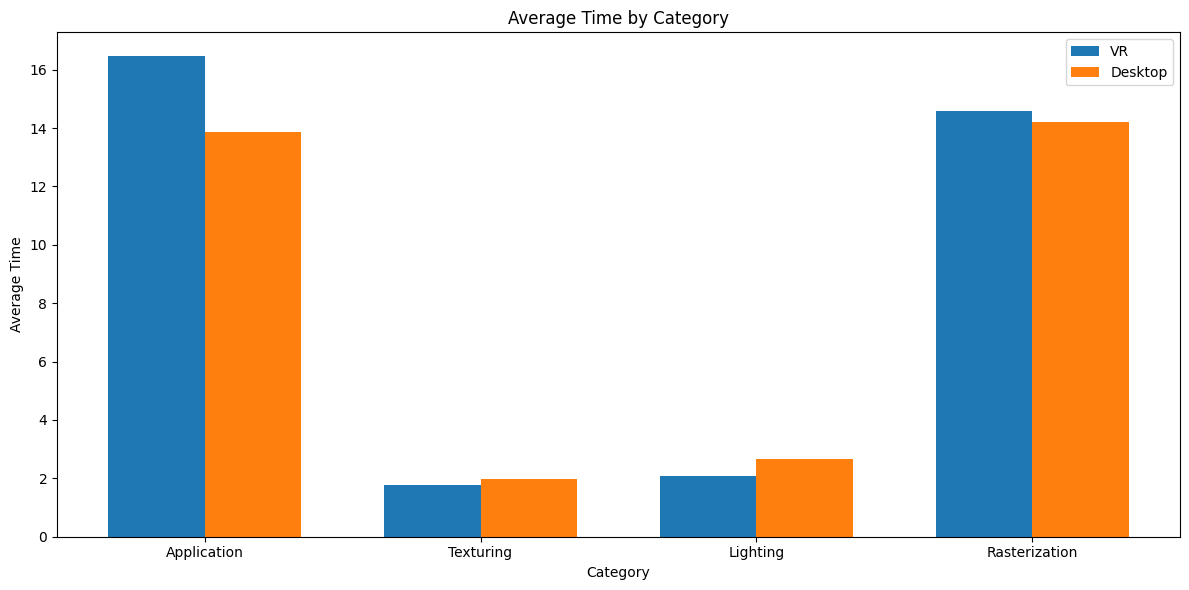

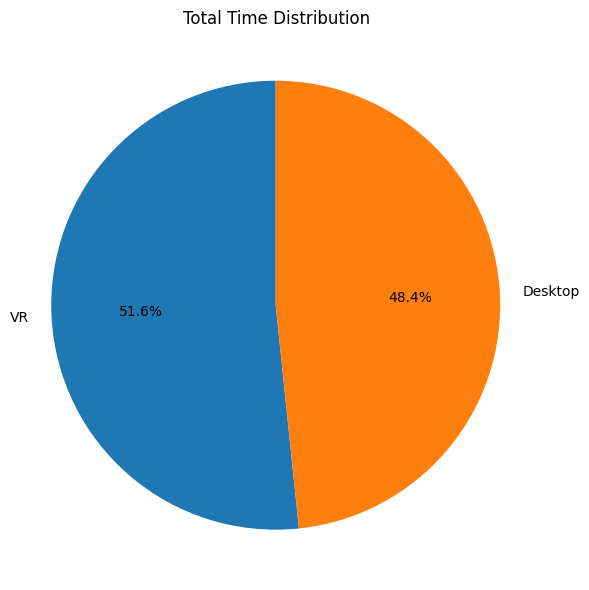

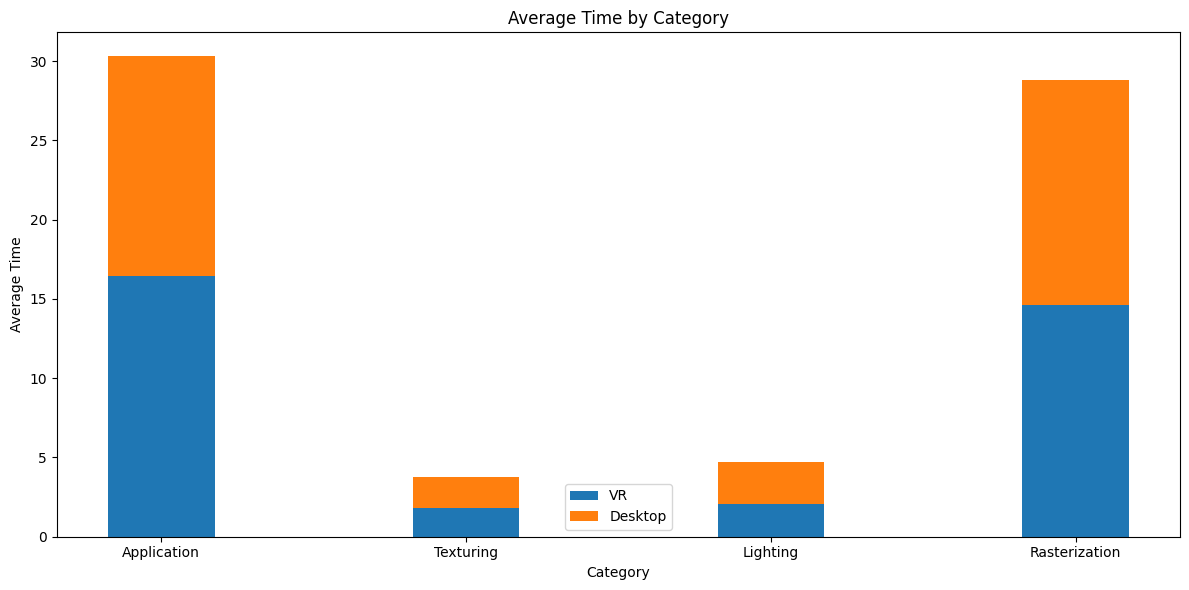

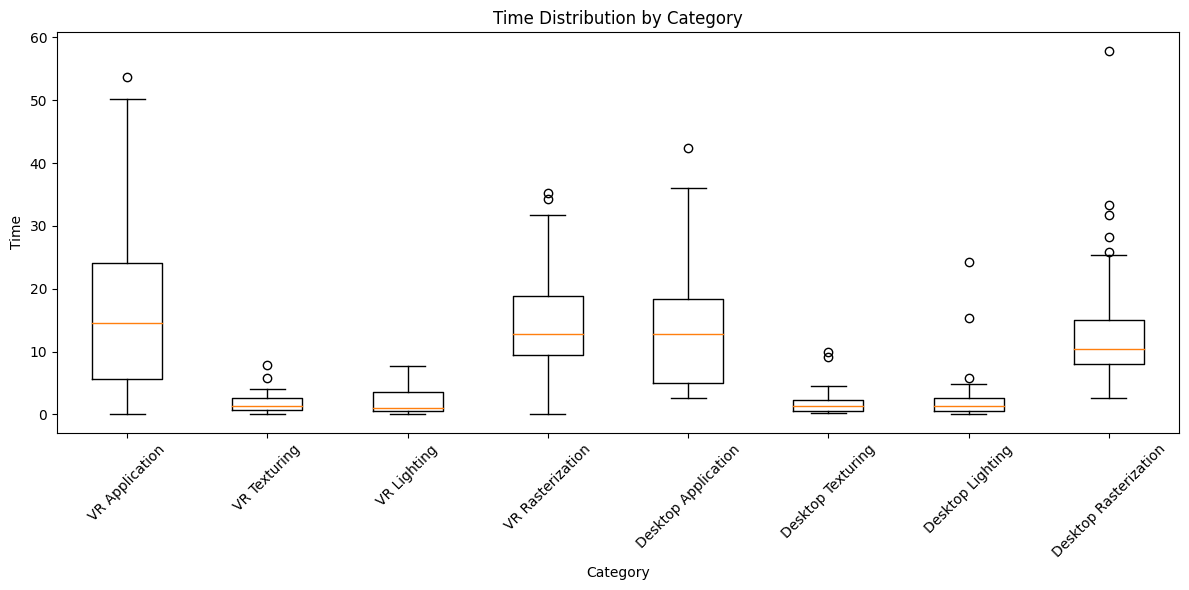

In [17]:
# Filter values over 60
for mode in times_sorted_vr:
    for category in times_sorted_vr[mode]:
        times_sorted_vr[mode][category] = [
            value for value in times_sorted_vr[mode][category] if value <= 60]

# Method 1: Bar Plot
plt.figure(figsize=(12, 6))
categories = ['Application', 'Texturing', 'Lighting', 'Rasterization']
interact_values = [sum(times_sorted_vr["vr"]['application']) / len(times_sorted_vr["vr"]['application']),
                   sum(times_sorted_vr["vr"]['texturing']) /
                   len(times_sorted_vr["vr"]['texturing']),
                   sum(times_sorted_vr["vr"]['lighting']) /
                   len(times_sorted_vr["vr"]['lighting']),
                   sum(times_sorted_vr["vr"]['rasterization']) / len(times_sorted_vr["vr"]['rasterization'])]
non_interact_values = [sum(times_sorted_vr["desktop"]['application']) / len(times_sorted_vr["desktop"]['application']),
                       sum(times_sorted_vr["desktop"]['texturing']) /
                       len(times_sorted_vr["desktop"]['texturing']),
                       sum(times_sorted_vr["desktop"]['lighting']) /
                       len(times_sorted_vr["desktop"]['lighting']),
                       sum(times_sorted_vr["desktop"]['rasterization']) / len(times_sorted_vr["desktop"]['rasterization'])]
bar_width = 0.35
index = range(len(categories))
plt.bar(index, interact_values, bar_width, label='VR')
plt.bar([i + bar_width for i in index], non_interact_values,
        bar_width, label='Desktop')
plt.xlabel('Category')
plt.ylabel('Average Time')
plt.title('Average Time by Category')
plt.xticks([i + bar_width/2 for i in index], categories)
plt.legend()
plt.tight_layout()
plt.show()

# Method 2: Pie Chart
plt.figure(figsize=(6, 6))
labels = ['VR', 'Desktop']
sizes = [sum(interact_values), sum(non_interact_values)]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Total Time Distribution')
plt.axis('equal')
plt.tight_layout()
plt.show()

# Method 3: Stacked Bar Plot
plt.figure(figsize=(12, 6))
bar_width = 0.35
plt.bar(categories, interact_values, bar_width, label='VR')
plt.bar(categories, non_interact_values, bar_width,
        bottom=interact_values, label='Desktop')
plt.xlabel('Category')
plt.ylabel('Average Time')
plt.title('Average Time by Category')
plt.legend()
plt.tight_layout()
plt.show()

# Method 4: Box Plot
plt.figure(figsize=(12, 6))
values_sorted = [times_sorted_vr["vr"]['application'],
                 times_sorted_vr["vr"]['texturing'],
                 times_sorted_vr["vr"]['lighting'],
                 times_sorted_vr["vr"]['rasterization'],
                 times_sorted_vr["desktop"]['application'],
                 times_sorted_vr["desktop"]['texturing'],
                 times_sorted_vr["desktop"]['lighting'],
                 times_sorted_vr["desktop"]['rasterization']]
labels = ['VR Application',
          'VR Texturing',
          'VR Lighting',
          'VR Rasterization',
          'Desktop Application',
          'Desktop Texturing',
          'Desktop Lighting',
          'Desktop Rasterization']

plt.boxplot(values_sorted, labels=labels)
plt.xlabel('Category')
plt.ylabel('Time')
plt.title('Time Distribution by Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
